# Week2: 描述性统计

- 集中趋势
- 离散程度
- 分布形状



In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
sns.set()

# 显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

from scipy import stats

# 集中趋势
- 众数
- 顺序数据
    - 中位数
    - 分位数
- 平均数
    - 简单平均
    - 加权平均
    - 几何平均

## 众数
**众数**是一组数据出现次数**最多**的变量值，用$M_o$表示。
众数用于**分类数据**的**集中趋势**，也可以顺序数据以及
数值型数据集中趋势的测试度。

只有在数据量较多的情况下众数才有意义。

众数是一个**位置代表值**，它不受数据极端值影响。从分布
的角度看，众数具有明显集中趋势点的数值。

众数可能不存在，也可以存在多个


### python实现

pandas实现:
`ser.mode()`

scipy实现
`stats.mode(arr)`


In [2]:
# pandas实现
nums=np.random.randint(1,10,20)
print(nums)
pd.Series(nums).mode()


[3 3 4 6 9 2 5 2 4 4 4 3 7 5 9 7 3 5 9 7]


0    3
1    4
dtype: int32

In [3]:
# scipy实现

modeResult=stats.mode(nums)
print(f'mode={modeResult[0][0]},\
    count={modeResult[1][0]}')
modeResult



mode=3,    count=4


ModeResult(mode=array([3]), count=array([4]))

## 顺序数据: 分位数
### 中位数
**中位数**是一组数据排序后后处于中间位置上变量值，
用$M_e$表示。




中位数是一个**位置**代表值，不受极端值影响。

#### python实现中位数

pandas实现: `ser.median()`

numpy实现:`np.median()`

In [4]:
# pandas实现
pd.Series(nums).median()


4.5

In [5]:
# numpy实现

print(np.median(nums))


4.5


### 四分位数

四分位数是一组数据排序后处于25%和75%位置上的值。

#### python实现
pandas实现:`ser.quantile()`
numpy实现:`np.percentile(arr,.25)`

In [6]:
# pandas实现
# 25%分位数
pd.Series(nums).quantile(q=.25)


3.0

In [7]:
# numpy实现
# 75%分位数
np.percentile(nums,.75)


2.0

## 平均数
### 简单平均
简单平均数是为分组数据计算的平均数
$$
\bar{x}=\frac{\sum_{i=1}^nx_i}{n}
$$

### 加权平均
根据分组数据计算的平均数为加权平均。

设原始数据非分为k组，各组数据的组中值分别是$M_i$，
各组变量出现的频数是$f_i$，则公式为

$$
\bar{x}=
\frac{M_1 f_1+M_2 f_2+\cdots+M_k f_k}{f1+\cdots +f_k}
$$
#### python实现

numpy实现:`np.average(arr,weights=[])

In [8]:
# 生成4x4随机整数矩阵
arr=np.random.randint(10,90,16).reshape(4,4)
arr

array([[43, 77, 34, 11],
       [19, 52, 60, 77],
       [74, 12, 63, 60],
       [32, 30, 36, 54]])

In [9]:
# 计算每一行的加权平均
np.average(arr,axis=0,weights=[4,3,2,1])


array([40.9, 51.8, 47.8, 44.9])

In [10]:
# 计算每一列加权平均
np.average(arr,axis=1,weights=[4,3,2,1])


array([48.2, 42.9, 51.8, 34.4])

### 几何平均
$$
G=\sqrt[n]{\prod_{i=1}^{n}x_i}
$$

#### python实现
scipy: `stats.gmean()`

In [11]:
# scipy实现
stats.gmean(nums)



4.5666044377307795

## 众数、中位数和均值的特点和应用

众数|中位数|均值
:---:|:---:|:---:
不唯一性|不受极端值影响|可以利用全部数据信息
分类数据集中趋势测度|偏斜分布|对称、接近对称分布

In [12]:
# 正态分布
from scipy.stats import norm
mean,var,skew,kurt=norm.stats(moments='mvsk')
x=np.linspace(
    norm.ppf(.01),
    norm.ppf(.99),
    100
)

In [13]:
# 右偏分布
from scipy.stats import skewnorm

a1=4
mean1,var1,skew1,kurt1=skewnorm.stats(a1,moments='mvsk')

x1=np.linspace(
    skewnorm.ppf(.01,a1),
    skewnorm.ppf(.99,a1),100
)

# rv=skewnorm(a)


In [14]:
# 左偏分布
a2=-4
mean2,var2,skew2,kurt2=skewnorm.stats(a2,moments='mvsk')

x2=np.linspace(
    skewnorm.ppf(.01,a2),
    skewnorm.ppf(.99,a2),100
)

# rv=skewnorm(a)



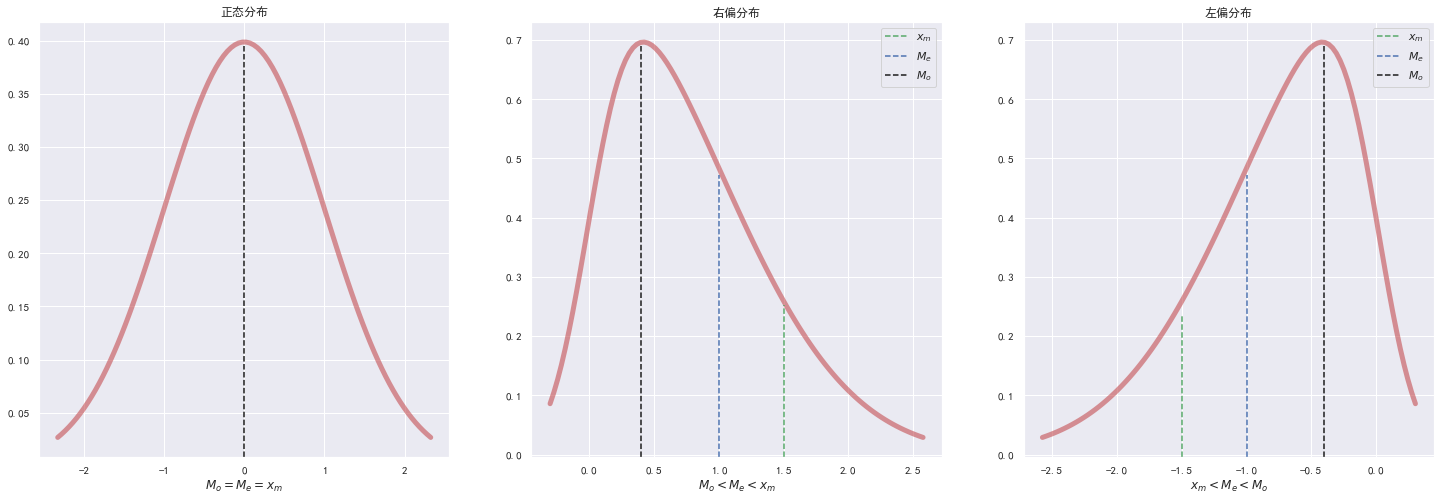

In [15]:
fig,ax=plt.subplots(1,3,figsize=(25,8))

ax[0].plot(x,norm.pdf(x),'r-',lw=5,
alpha=.6)
ax[0].set_title('正态分布')
ax[0].axvline(x=0,ymin=0,ymax=.95,linestyle='--',
color='k')
ax[0].set_xlabel('$M_o=M_e=x_m$')
ax[1].plot(x1,skewnorm.pdf(x1,a1),
'r-',lw=5,alpha=.6)
ax[1].set_title('右偏分布')
ax[1].set_xlabel('$M_o<M_e<x_m$')
ax[1].axvline(x=1.5,ymin=0,ymax=.35,linestyle='--',
color='g',label='$x_m$')
ax[1].axvline(x=1,ymin=0,ymax=.65,linestyle='--',
color='b',label='$M_e$')
ax[1].axvline(x=.4,ymin=0,ymax=.95,linestyle='--',
color='k',label='$M_o$')
ax[1].legend()
ax[2].plot(x2,skewnorm.pdf(x2,a2),
'r-',lw=5,alpha=.6)
ax[2].axvline(x=-1.5,ymin=0,ymax=.33,linestyle='--',
color='g',label='$x_m$')
ax[2].axvline(x=-1,ymin=0,ymax=.65,linestyle='--',
color='b',label='$M_e$')
ax[2].axvline(x=-.4,ymin=0,ymax=.95,linestyle='--',
color='k',label='$M_o$')
ax[2].set_title('左偏分布')
ax[2].set_xlabel('$x_m<M_e<M_o$')
ax[2].legend()


# 离散程度度量
- 分类数据: 异众比率
- 顺序数据: 四分位差
- 数值型数据: 方差、标准差
- 相对离散程度: 离散系数

## 分类数据: 异众比率
**异众比率**是指非众数组的频数占总频数比率，用
$V_r$，公式为
$$
V_r=\frac{\sum f_i-f_m}{\sum f_i}
=1-\frac{f_m}{\sum f_i}
$$

$\sum f_i$为变量值的总频数

$f_m$为众数组的频数

异众比率主要用于衡量众数对一组数据代表程度。

异众比率越大，说明非众数组的频数占总频数的比重越大，
众数代表性越差.

异众比率越小，说明非众数组的频数占总频数的比重越小，
众数的代表性越好。


In [18]:
# 读取例3.3数据
df3_4:pd.DataFrame=pd.read_excel('data/例3.3.xlsx')
df3_4.head()

,顾客性别,饮料类型
0,女,碳酸饮料
1,男,绿茶
2,男,矿泉水
3,女,矿泉水
4,男,碳酸饮料


In [17]:
# 获取每个饮料类型的频数
vals=df3_4['饮料类型'].value_counts()
# 计算异众比率
(np.sum(vals)-np.max(vals))/np.sum(vals)


0.7

In [19]:
# 函数包装
def variance_ratio(ser:pd.Series):
    vals=ser.value_counts()
    return (np.sum(vals)-np.max(vals))/np.sum(vals)

variance_ratio(df3_4['饮料类型'])


0.7

## 顺序数据: 四分位差

**四分位差**是**上四分数**与**下四分数**之差:
$$
Q_d=Q_H-Q_L
$$


四分位差反映了中间50%数据的离散程度，说明
中位数对一组数据的代表程度，数值越小，
说明中间数据越集中。

数值越大，说明中间值越分散。

四分位差主要用于测度**顺序数据**的离散程度，
数值型数据也可以计算四分位差，但不适合分类数据。

In [4]:
df4_5:pd.DataFrame=pd.read_excel(
    'data/例4.5.xlsx'
)
df4_5


,月收入
0,1500
1,750
2,780
3,1080
4,850
5,960
6,2000
7,1250
8,1630


In [20]:
df4_5['月收入'].quantile(q=.75)-df4_5['月收入'].quantile(q=.25)


650.0

## 数值型数据: 方差和标准差

### 极差
一组数据的最大值与最小值之差称为**极差**，用
R表示
$$
R=max-min
$$

极差是最简单描述数据离散度的测度值，计算简单。

但极差容易受到极端值影响，且不能反映中间数据状态。

### 平均差
平均差是各变量值与其平均数的离差绝对值的平均数，
用$M_d$表示。

未分组:
$$
M_d=\frac{\sum_{i=1}^n|x_i-\bar{x}|}{n}
$$


分组:
$$
M_d=\frac{\sum_{i=1}^k |M_i-\bar{x}| f_i}{n}
$$

In [13]:
df3_6:pd.DataFrame=pd.read_excel(
    'data/例3.6.xlsx'
)
df3_6


,销售量
0,234
1,143
2,187
3,161
4,150
...,...
115,210
116,168
117,211
118,172


In [22]:
# 计算频数
freqs=pd.cut(df3_6['销售量'],
bins=[i for i in range(140,250,10)],
include_lowest=True,right=False,
precision=0).value_counts().sort_index()
freqs=freqs.reset_index().rename(
    columns={'index':'bins','销售量':'频数'}
)
freqs


,bins,频数
0,"[140, 150)",4
1,"[150, 160)",9
2,"[160, 170)",16
3,"[170, 180)",27
4,"[180, 190)",20
5,"[190, 200)",17
6,"[200, 210)",10
7,"[210, 220)",8
8,"[220, 230)",4
9,"[230, 240)",5


In [23]:
# merge两个df
df3_6['bins']=pd.cut(
    df3_6['销售量'],
    bins=[i for i in range(140,250,10)],
    include_lowest=True,right=False # right=False指定左边是闭区间
)
df3_6=df3_6.merge(
    freqs,how='left',on='bins'
)
df3_6.head()



,销售量,bins,频数
0,234,"[230, 240)",5
1,143,"[140, 150)",4
2,187,"[180, 190)",20
3,161,"[160, 170)",16
4,150,"[150, 160)",9


#### pandas技巧：自定义groupby聚合函数

```py
def groupby_func(x):
    
    # x: 被group by的数据组
    return x.mean()
```

In [24]:
# 计算组中值
cls_midpoint=lambda x:(x.max()+x.min())/2

midpoint=df3_6.groupby('bins')['销售量'].apply(cls_midpoint).reset_index()
midpoint=midpoint.rename(columns={'销售量':'组中值'})
midpoint['组中值']=midpoint['组中值'].apply(round)
midpoint


,bins,组中值
0,"[140, 150)",145
1,"[150, 160)",154
2,"[160, 170)",164
3,"[170, 180)",174
4,"[180, 190)",184
5,"[190, 200)",194
6,"[200, 210)",204
7,"[210, 220)",214
8,"[220, 230)",226
9,"[230, 240)",235


In [25]:
df3_6=df3_6.merge(midpoint,how='left',on='bins')
df3_6.head()

# # %%
# df3_6.groupby('bins')['频数'].max().reset_index()


,销售量,bins,频数,组中值
0,234,"[230, 240)",5,235
1,143,"[140, 150)",4,145
2,187,"[180, 190)",20,184
3,161,"[160, 170)",16,164
4,150,"[150, 160)",9,154


In [26]:
df3_62=pd.merge(freqs,midpoint,on='bins')
df3_62


,bins,频数,组中值
0,"[140, 150)",4,145
1,"[150, 160)",9,154
2,"[160, 170)",16,164
3,"[170, 180)",27,174
4,"[180, 190)",20,184
5,"[190, 200)",17,194
6,"[200, 210)",10,204
7,"[210, 220)",8,214
8,"[220, 230)",4,226
9,"[230, 240)",5,235


In [27]:
df3_62['Mi-x_m']=np.abs(
    df3_62['组中值']-df3_6['销售量'].mean()
)
df3_62['Mi-x_m']=df3_62['Mi-x_m'].apply(np.around)
df3_62

,bins,频数,组中值,Mi-x_m
0,"[140, 150)",4,145,40.0
1,"[150, 160)",9,154,31.0
2,"[160, 170)",16,164,21.0
3,"[170, 180)",27,174,11.0
4,"[180, 190)",20,184,1.0
5,"[190, 200)",17,194,9.0
6,"[200, 210)",10,204,19.0
7,"[210, 220)",8,214,29.0
8,"[220, 230)",4,226,41.0
9,"[230, 240)",5,235,50.0


In [28]:
df3_62['Mi-x_m_fi']=df3_62['Mi-x_m']*df3_62['频数']
df3_62


,bins,频数,组中值,Mi-x_m,Mi-x_m_fi
0,"[140, 150)",4,145,40.0,160.0
1,"[150, 160)",9,154,31.0,279.0
2,"[160, 170)",16,164,21.0,336.0
3,"[170, 180)",27,174,11.0,297.0
4,"[180, 190)",20,184,1.0,20.0
5,"[190, 200)",17,194,9.0,153.0
6,"[200, 210)",10,204,19.0,190.0
7,"[210, 220)",8,214,29.0,232.0
8,"[220, 230)",4,226,41.0,164.0
9,"[230, 240)",5,235,50.0,250.0


In [29]:
# 计算平均差
df3_62['Mi-x_m_fi'].sum()/df3_62['频数'].sum()


17.341666666666665

## 方差和标准差
方差是各变量值与其均值离差平方的平均数。

样本方差:
$$
s^2=\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}
$$
样本标准差
$$
s=\sqrt{s^2}
$$

### 自由度

自由度是指附加给独立的观测值的约束或限制个数，即一组数据中可以自由取值的个数。当样本数据的个数未n时，若样本均值$\bar{x}$确定下来，则附加给n个观测值的约束就是1个，因此只有n-1个数据可以自由取值，其中必有一个数据不能自由取值。

例如，样本有3个数值，当$\bar{x}$确定后，只有两个数据可以自由取值，另一个不能取值。

样本自由度为(n-1)。

在计算离差平方和$\sum_{i=1}^n(x_i-x)^2$


#### python实现
- `np.var(arr,ddof=1`:`ddof`指定自由度, `ddof=1`表示n-1个自由度
- `np.std(arr,ddof=1)`

In [30]:
# python实现分组标准差
df3_62['Mi-x_m^2']=df3_62['组中值']-df3_6['销售量'].mean()
df3_62['Mi-x_m^2']=np.square(df3_62['Mi-x_m^2'])
df3_62


,bins,频数,组中值,Mi-x_m,Mi-x_m_fi,Mi-x_m^2
0,"[140, 150)",4,145,40.0,160.0,1565.521111
1,"[150, 160)",9,154,31.0,279.0,934.321111
2,"[160, 170)",16,164,21.0,336.0,422.987778
3,"[170, 180)",27,174,11.0,297.0,111.654444
4,"[180, 190)",20,184,1.0,20.0,0.321111
5,"[190, 200)",17,194,9.0,153.0,88.987778
6,"[200, 210)",10,204,19.0,190.0,377.654444
7,"[210, 220)",8,214,29.0,232.0,866.321111
8,"[220, 230)",4,226,41.0,164.0,1716.721111
9,"[230, 240)",5,235,50.0,250.0,2543.521111


In [31]:
# 计算标准差
df3_62['Mi-x_m^2_fi']=df3_62['Mi-x_m^2']*df3_62['频数']
np.sqrt(df3_62['Mi-x_m^2_fi'].sum()/(df3_62['频数'].sum()-1))



21.74417079553585

## 相对位置度量
### 标准分数

变量值与均值的离差除以标准差后值称为**标准分数**(z score)   
$$
z_i=\frac{x_i-\bar{x}}{s}
$$
对多个具有不同量纲变量处理时，需要进行标准化

#### python实现
scipy: `stats.zscore()`

In [5]:
def z_score(ser:pd.Series):
    
    vals=ser.copy()
    # ddof指定np.std()的自由度为n-1
    return (vals-ser.mean())/np.std(ser,ddof=1)

df4_5['标准分数']=z_score(df4_5['月收入'])
df4_5


,月收入,标准分数
0,1500,0.694955
1,750,-1.042432
2,780,-0.972937
3,1080,-0.277982
4,850,-0.810781
5,960,-0.555964
6,2000,1.853213
7,1250,0.115826
8,1630,0.996102


In [6]:
# 也可用scipy实现
stats.zscore(df4_5['月收入'])



array([ 0.73711087, -1.10566631, -1.03195522, -0.29484435, -0.85996269,
       -0.5896887 ,  1.96562899,  0.12285181,  1.05652558])

### 经验法则(3$\sigma$法则)

当一组数据**对称分布**:
- 68%的数据位于$\mu \pm \sigma$范围
- 95%的数据位于$\mu \pm 2\sigma$范围
- 99%的数据位于$\mu \pm 3\sigma$范围


### 切比雪夫不等式
当一组数据**非对称分布**，则根据切比雪夫不等式, 至少有
$(1-\frac{1}{k^2})$的数据落在$\pm k$个标准差之内:

- 75%的数据位于$\mu \pm 2\sigma $
- 89%的数据位于$\mu \pm 3\sigma $
- 94%的数据位于$\mu \pm 4\sigma $

### 离散系数

离散系数(coefficient of variation)是一组数据标准差与
相应的平均数之比:
$$
v_s=\frac{s}{\bar{x}}
$$
$v_s$大，说明数据离散程度大，反之，小

#### python实现
scipy: stats.variation()

In [8]:
names=['姓名','国家','预赛成绩']
names.extend([str(i)for i in range(1,11)])

In [9]:
df4_14=pd.read_excel(
    'data/例4.14.xlsx',header=None,
    names=names,skiprows=1
)
df4_14


,姓名,国家,预赛成绩,1,2,3,4,5,6,7,8,9,10
0,纳塔利娅·帕杰林娜,俄罗斯,391,10.0,8.5,10.0,10.2,10.6,10.5,9.8,9.7,9.5,9.3
1,郭文珺,中国,390,10.0,10.5,10.4,10.4,10.1,10.3,9.4,10.7,10.8,9.7
2,卓格巴德拉赫·蒙赫珠勒,蒙古,387,9.3,10.0,8.7,8.3,9.2,9.5,8.5,10.7,9.2,9.2
3,妮诺·萨卢克瓦泽,格鲁吉亚,386,9.8,10.3,10.0,9.5,10.2,10.7,10.4,10.6,9.1,10.8
4,维多利亚·柴卡,白俄罗斯,384,9.3,9.4,10.4,10.1,10.2,10.5,9.2,10.5,9.8,8.6
5,莱万多夫斯卡·萨贡,波兰,384,8.1,10.3,9.2,9.9,9.8,10.4,9.9,9.4,10.7,9.6
6,亚斯娜·舍卡里奇,塞尔维亚,384,10.2,9.6,9.9,9.9,9.3,9.1,9.7,10.0,9.3,9.9
7,米拉·内万苏,芬兰,384,8.7,9.3,9.2,10.3,9.8,10.0,9.7,9.9,9.9,9.7


In [10]:
df4_142=df4_14.iloc[:,:3]
df4_142['平均环']=df4_14.iloc[:,3:].mean(axis=1)
df4_142['标准差']=df4_14.iloc[:,3:].std(axis=1)
# df4_142['离散系数']=df4_14.iloc[:,3:].apply(stats.variation,axis=1)
df4_142['离散系数']=df4_142['标准差']/df4_142['平均环']
df4_142




,姓名,国家,预赛成绩,平均环,标准差,离散系数
0,纳塔利娅·帕杰林娜,俄罗斯,391,9.81,0.615449,0.062737
1,郭文珺,中国,390,10.23,0.437290,0.042746
2,卓格巴德拉赫·蒙赫珠勒,蒙古,387,9.26,0.707421,0.076395
3,妮诺·萨卢克瓦泽,格鲁吉亚,386,10.14,0.546097,0.053856
4,维多利亚·柴卡,白俄罗斯,384,9.80,0.649786,0.066305
5,莱万多夫斯卡·萨贡,波兰,384,9.73,0.733409,0.075376
6,亚斯娜·舍卡里奇,塞尔维亚,384,9.69,0.357305,0.036874
7,米拉·内万苏,芬兰,384,9.65,0.462481,0.047926


# 偏态与峰态

## 偏态
**偏态**是对数据分布对称性的测度。

未分组:
$$
SK=\frac{n\sum(x_i-\bar{x})^3}{(n-1)(n-2)s^3}
$$

分组:
$$
SK=\frac{\sum_{i=1}^k(M_i-\bar{x})f_i}{ns^3}
$$

#### python实现
scipy: `stats.skew()`

In [14]:
stats.skew(df3_6['销售量'])

0.4002010289897394

## 峰态
峰态是对数据的平峰或尖峰的测度

- K>0: 尖峰分布，数据分布更集中
- K<0: 平峰分布，数据分布更分散
- K=0: 正态分布

### python实现
scipy: `stats.kurtosis()`

In [ ]:
stats.kurtosis(df3_6['销售量'])